# ElasticNet

In [1]:
path=  'C:/Users/felipe/Documents/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felipe/Documents/Brain/Brain_Model/'
import sys
sys.path.append(path_) 

In [2]:
from sklearn.linear_model import ElasticNet
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class ElasticNetRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="ElasticNet"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = ElasticNet
        if params is None:
            self.params = {
                'alpha': 0.2,
                'l1_ratio': 0.5,  # Proporción de L1 en la regularización
                'max_iter': 10000,
                # 'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.001, 10.0, prior='log-uniform'),
                'l1_ratio': Real(0.0, 1.0),  # Rango de 0 a 1 para la proporción de L1
                'max_iter': Integer(100, 10000),
                'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# 72 Features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# Data

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle


file_path_CN = f'{path}Brain_Aging/CN_freq.xlsx'
file_path_AD = f'{path}Brain_Aging/AD_freq.xlsx'
file_path_FTD = f'{path}Brain_Aging/FTD_freq.xlsx'
file_path_MCI = f'{path}Brain_Aging/MCI_freq.xlsx'
file_path_PD = f'{path}Brain_Aging/PD_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)
df_PD = pd.read_excel(file_path_PD)

df_CN_filtrado = df_CN[(df_CN['Age'] >=50) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_AD_filtrado = df_AD[(df_AD['Age'] >= 50) & (df_AD['Age'] <= 90)].reset_index(drop=True)
df_FTD_filtrado = df_FTD[(df_FTD['Age'] >= 50) & (df_FTD['Age'] <= 90)].reset_index(drop=True)
df_MCI_filtrado = df_MCI[(df_MCI['Age'] >= 50) & (df_MCI['Age'] <= 90)].reset_index(drop=True)
df_PD_filtrado = df_PD[(df_PD['Age'] >= 50) & (df_PD['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID-unique"]

X_AD = df_AD_filtrado[features]
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID-unique"]

X_FTD = df_FTD_filtrado[features]
y_FTD = df_FTD_filtrado["Age"]
ID_FTD = df_FTD_filtrado["ID-unique"]

X_MCI = df_MCI_filtrado[features]
y_MCI = df_MCI_filtrado["Age"]
ID_MCI = df_MCI_filtrado["ID-unique"]

X_PD = df_PD_filtrado[features]
y_PD = df_PD_filtrado["Age"]
ID_PD = df_PD_filtrado["ID-unique"]

# 
X_combined = pd.concat([X_CN, X_AD, X_FTD, X_MCI, X_PD], axis=0).reset_index(drop=True)
#X_combined = pd.concat([X_CN, X_AD], axis=0).reset_index(drop=True)
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)
X_AD_scaled = scaler.transform(X_AD)
X_FTD_scaled = scaler.transform(X_FTD)
X_MCI_scaled = scaler.transform(X_MCI)
X_PD_scaled = scaler.transform(X_PD)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)
X_AD_scaled = pd.DataFrame(X_AD_scaled, columns=X_AD.columns)
X_FTD_scaled = pd.DataFrame(X_FTD_scaled, columns=X_FTD.columns)
X_MCI_scaled = pd.DataFrame(X_MCI_scaled, columns=X_MCI.columns)
X_PD_scaled = pd.DataFrame(X_PD_scaled, columns=X_PD.columns)

In [5]:
df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD, y_FTD, ID_FTD], axis=1, ignore_index=False)
df_concatenado_MCI = pd.concat([X_MCI, y_MCI, ID_MCI], axis=1, ignore_index=False)
df_concatenado_PD = pd.concat([X_PD, y_PD, ID_PD], axis=1, ignore_index=False)

lista_dfs = [df_concatenado_AD, df_concatenado_FTD, df_concatenado_MCI,df_concatenado_PD]

In [6]:
model = ElasticNetRegressor()
Plotters = Plotter()

In [ ]:
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='r2')


In [10]:
with open(f'{path}Brain_Aging/Opt_Model/opt_Elastic.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

In [7]:
with open(f'{path}Brain_Aging/Opt_Model/opt_Elastic.pickle', 'rb') as file:
    opt_model= pickle.load(file)

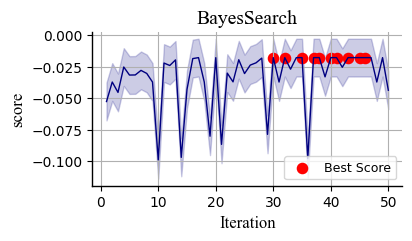

Top 1: Iteration 32, Score -0.01784196125854527
Top 2: Iteration 41, Score -0.017842008162505796
Top 3: Iteration 46, Score -0.017842079419498603
Top 4: Iteration 43, Score -0.01784242292828484
Top 5: Iteration 38, Score -0.017842488875178232
Top 6: Iteration 45, Score -0.017842593194654498
Top 7: Iteration 30, Score -0.017843742910453243
Top 8: Iteration 35, Score -0.017844627542205872
Top 9: Iteration 40, Score -0.017845788217132418
Top 10: Iteration 37, Score -0.017848436903108313


In [8]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.015)

In [9]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'alpha': 1.6037350537643136, 'l1_ratio': 0.0, 'max_iter': 100, 'tol': 0.01},
 {'alpha': 1.6165637199175233, 'l1_ratio': 0.0, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 1.5960193834722356, 'l1_ratio': 0.0, 'max_iter': 100, 'tol': 0.01},
 {'alpha': 1.6213460413791914,
  'l1_ratio': 0.0,
  'max_iter': 8531,
  'tol': 1.7250428348747825e-05},
 {'alpha': 1.6329705882496084, 'l1_ratio': 0.0, 'max_iter': 100, 'tol': 0.01},
 {'alpha': 1.5987524625023732,
  'l1_ratio': 0.0,
  'max_iter': 9318,
  'tol': 1e-05},
 {'alpha': 1.5757349856340028,
  'l1_ratio': 0.0,
  'max_iter': 10000,
  'tol': 0.01},
 {'alpha': 1.66438509406721, 'l1_ratio': 0.0, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 1.677423166415804,
  'l1_ratio': 0.0,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 1.5345383744394723,
  'l1_ratio': 0.0,
  'max_iter': 10000,
  'tol': 0.01}]

# Training

In [ ]:
results_labels_df_CN_train, results_labels_df_CN_test, results_labels_list, results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_pat= model.trainer(df_concatenado_CN, lista_dfs, n_splits=10, n_iterations=20, params_=best_params_[0])

In [14]:
import pickle

results_training = [results_labels_df_CN_train, results_labels_df_CN_test, results_labels_list, 
           results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_pat]

with open('results_model/resultados_modelo.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [10]:
with open('results_model/resultados_modelo.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_labels_list, results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_pat = loaded_results

In [11]:
results_labels_df_AD=results_labels_list[0]
results_labels_df_FTD=results_labels_list[1]
results_labels_df_MCI=results_labels_list[2]
results_labels_df_PD=results_labels_list[3]

results_labels_df_total = [results_labels_df_CN_test, results_labels_df_AD, results_labels_df_FTD,results_labels_df_MCI,results_labels_df_PD]

results_avg_list = model.avg_list(results_labels_df_total)

results_avg_list_CN = results_avg_list[0]
results_avg_list_AD = results_avg_list[1]
results_avg_list_FTD = results_avg_list[2]
results_avg_list_MCI = results_avg_list[3]
results_avg_list_PD = results_avg_list[4]

df_CN_seleccion = df_CN_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_combined = results_avg_list_CN.merge(df_CN_seleccion, on='ID-unique', how='left')

df_AD_seleccion = df_AD_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined = results_avg_list_AD.merge(df_AD_seleccion, on='ID-unique', how='left')

df_FTD_seleccion = df_FTD_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_combined = results_avg_list_CN.merge(df_FTD_seleccion, on='ID-unique', how='left')

df_MCI_seleccion = df_MCI_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined = results_avg_list_MCI.merge(df_MCI_seleccion, on='ID-unique', how='left')

df_PD_seleccion = df_PD_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_PD_combined = results_avg_list_PD.merge(df_PD_seleccion, on='ID-unique', how='left')


In [17]:
# Guardar los dataframes combinados en archivos Excel
df_CN_combined.to_excel('results/df_CN_combined.xlsx', index=False)
df_AD_combined.to_excel('results/df_AD_combined.xlsx', index=False)
df_FTD_combined.to_excel('results/df_FTD_combined.xlsx', index=False)
df_MCI_combined.to_excel('results/df_MCI_combined.xlsx', index=False)
df_PD_combined.to_excel('results/df_PD_combined.xlsx', index=False)


C:\Users/felipe/Documents/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felipe/Documents/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


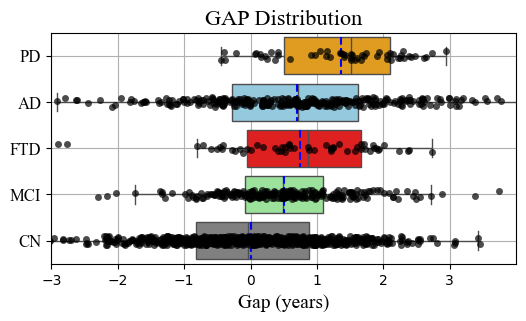

In [12]:
# Crear un DataFrame en formato largo para los errores
corrected_gap_AD = pd.to_numeric(results_avg_list[1]['GAP_corrected'])
corrected_gap_FTD = pd.to_numeric(results_avg_list[2]['GAP_corrected'])
corrected_gap_MCI = pd.to_numeric(results_avg_list[3]['GAP_corrected'])
corrected_gap_CN_test = pd.to_numeric(results_avg_list[0]['GAP_corrected'])
corrected_gap_PD = pd.to_numeric(results_avg_list[4]['GAP_corrected'])

data = {
    'Error': np.concatenate([corrected_gap_PD, corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test]),
    'Grupo': ['PD'] * len(corrected_gap_PD) + ['AD'] * len(corrected_gap_AD) + ['FTD'] * len(corrected_gap_FTD) + ['MCI'] * len(corrected_gap_MCI) + ['CN'] * len(corrected_gap_CN_test)
}

df_errors = pd.DataFrame(data)

# Definir la paleta de colores personalizada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'PD': 'orange',
    'CN': 'gray'
}

Plotters.plot_gap_distribution(df_errors, colores_personalizados,x_size=6, y_size=3,font='Times New Roman', weight='normal', xlabel='Gap (years)', x_limits=(-3, 4),fontsize=14)

CN - Pendiente: 0.016500197820624455, Intercepto: 64.98968737253267
AD - Pendiente: 0.038067520847617116, Intercepto: 64.23618119748807
FTD - Pendiente: -0.017481307160361014, Intercepto: 68.16745972588605
MCI - Pendiente: 0.004396061904926191, Intercepto: 66.32763032470241
PD - Pendiente: 0.004566656906633159, Intercepto: 67.09435734394023


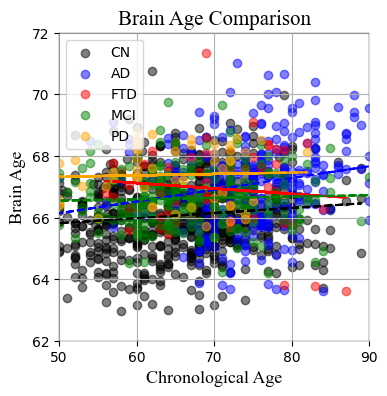

In [13]:
results_avg_CN = results_avg_list[0][['y_labels', 'y_pred']].copy()
results_avg_AD = results_avg_list[1][['y_labels', 'y_pred']].copy()
results_avg_FTD     = results_avg_list[2][['y_labels', 'y_pred']].copy()
results_avg_MCI = results_avg_list[3][['y_labels', 'y_pred']].copy()
results_avg_PD = results_avg_list[4][['y_labels', 'y_pred']].copy()

df_list = [results_avg_CN, results_avg_AD, results_avg_FTD, results_avg_MCI, results_avg_PD]
colors = {'CN': 'black', 'AD': 'blue', 'FTD': 'red', 'MCI': 'green', 'PD': 'orange'}
labels = ['CN', 'AD', 'FTD', 'MCI', 'PD']
Plotters.plot_regression_diagnosis(df_list=df_list, colors=colors, title='Brain Age Comparison',labels=labels,x_ticks_step=10,y_ticks_step=2,x_min_limit=50,y_min_limit=62,x_max_limit=90,y_max_limit=72,line_ideal=False, alpha=0.5, xlabel='Chronological Age',ylabel='Brain Age',  font='Times New Roman', weight='normal', x_size=4,y_size=4, legend=True, fontsize=13, mode=3,xticks =1,yticks=1)

# SHAP

In [20]:
import shap
import numpy as np
import pandas as pd

def shap_values_calculate(df_train, df_test, results_per_fold_train, results_per_fold_test, results_model, feature_col_range):
    shap_values_dict = {id_unique: [] for id_unique in df_test['ID-unique'].unique()}
    
    for i in range(20):
        for k in range(10):

            # Train
            ID_train_fold = results_per_fold_train[i][k]['ID-unique']
            df_train_fold = df_train[df_train['ID-unique'].isin(ID_train_fold)]
            X_train_kf = df_train_fold.iloc[:, feature_col_range]  # Features
            y_train_kf = df_train_fold.iloc[:, -2]  # Labels

            # Test
            ID_test_fold = results_per_fold_test[i][k]['ID-unique']
            df_test_fold = df_test[df_test['ID-unique'].isin(ID_test_fold)]
            X_test_kf = df_test_fold.iloc[:, feature_col_range]  # Features
            y_test_kf = df_test_fold.iloc[:, -2]  # Labels

            # Scaling
            mean_X_train_kf = results_model['mean_X_train_kf'][k + 10 * i]
            std_X_train_kf = results_model['std_X_train_kf'][k + 10 * i]

            X_train_kf_scaled = (X_train_kf - mean_X_train_kf) / std_X_train_kf
            X_test_kf_scaled = (X_test_kf - mean_X_train_kf) / std_X_train_kf

            model_ = results_model['model'][k + 10 * i]

            # SHAP calculation
            explainer = shap.Explainer(model_, X_train_kf_scaled)
            shap_values = explainer.shap_values(X_test_kf_scaled)

            # Store SHAP values
            for idx, id_unique in enumerate(df_test_fold['ID-unique']):
                shap_values_dict[id_unique].append(shap_values[idx])

    # Average SHAP values
    shap_values_avg_dict = {id_unique: np.mean(values, axis=0) for id_unique, values in shap_values_dict.items()}

    # Prepare SHAP summary matrix
    shap_values_avg_matrix = [shap_values_avg_dict[id_unique] for id_unique in df_test['ID-unique'].unique()]
    shap_values_avg_array = np.array(shap_values_avg_matrix)

    feature_names = X_test_kf_scaled.columns.tolist()

    shap_values_df = pd.DataFrame(shap_values_avg_array, columns=feature_names)
    shap_values_df['ID-unique'] = df_test['ID-unique'].unique()
    shap_values_df.set_index('ID-unique', inplace=True)

    # SHAP summary
    shap_sum = np.abs(shap_values_avg_array).sum(axis=0)
    shap_summary = {feature: shap_sum[i] for i, feature in enumerate(feature_names)}
    shap_summary_sorted = sorted(shap_summary.items(), key=lambda x: x[1], reverse=True)

    return shap_values_avg_array, shap_summary_sorted



In [21]:
shap_values_CN, shap_summary_sorted_CN = shap_values_calculate(
    df_concatenado_CN, df_concatenado_CN, results_per_fold_CN_train, results_per_fold_CN_test, results_model, slice(None, -2)
)

shap_values_AD, shap_summary_sorted_AD = shap_values_calculate(
    df_concatenado_CN, df_concatenado_AD, results_per_fold_CN_train, results_per_fold_pat[0], results_model, slice(None, -2)
)

shap_values_FTD, shap_summary_sorted_FTD = shap_values_calculate(
    df_concatenado_FTD, df_concatenado_FTD, results_per_fold_CN_train, results_per_fold_pat[1], results_model, slice(None, -2)
)

shap_values_MCI, shap_summary_sorted_MCI = shap_values_calculate(
    df_concatenado_MCI, df_concatenado_MCI, results_per_fold_CN_train, results_per_fold_pat[2], results_model, slice(None, -2)
)

shap_values_PD, shap_summary_sorted_PD = shap_values_calculate(
    df_concatenado_PD, df_concatenado_PD, results_per_fold_CN_train, results_per_fold_pat[3], results_model, slice(None, -2)
)


In [22]:
with open('results_model/shap_summary_sorted_CN.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_CN, f)

with open('results_model/shap_values_CN.pkl', 'wb') as f:
    pickle.dump(shap_values_CN, f)

with open('results_model/shap_summary_sorted_AD.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_AD, f)

with open('results_model/shap_values_AD.pkl', 'wb') as f:
    pickle.dump(shap_values_AD, f)

with open('results_model/shap_summary_sorted_FTD.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_FTD, f)

with open('results_model/shap_values_FTD.pkl', 'wb') as f:
    pickle.dump(shap_values_FTD, f)

with open('results_model/shap_summary_sorted_MCI.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_MCI, f)

with open('results_model/shap_values_MCI.pkl', 'wb') as f:
    pickle.dump(shap_values_MCI, f)

with open('results_model/shap_summary_sorted_PD.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_PD, f)

with open('results_model/shap_values_PD.pkl', 'wb') as f:
    pickle.dump(shap_values_PD, f)

In [7]:
import pickle

# Leer los archivos y cargar los datos en las mismas variables
with open('results_model/shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/shap_values_CN.pkl', 'rb') as f:
    shap_values_CN = pickle.load(f)

with open('results_model/shap_summary_sorted_AD.pkl', 'rb') as f:
    shap_summary_sorted_AD = pickle.load(f)

with open('results_model/shap_values_AD.pkl', 'rb') as f:
    shap_values_AD = pickle.load(f)

with open('results_model/shap_summary_sorted_FTD.pkl', 'rb') as f:
    shap_summary_sorted_FTD = pickle.load(f)

with open('results_model/shap_values_FTD.pkl', 'rb') as f:
    shap_values_FTD = pickle.load(f)

with open('results_model/shap_summary_sorted_MCI.pkl', 'rb') as f:
    shap_summary_sorted_MCI = pickle.load(f)

with open('results_model/shap_values_MCI.pkl', 'rb') as f:
    shap_values_MCI = pickle.load(f)

with open('results_model/shap_summary_sorted_PD.pkl', 'rb') as f:
    shap_summary_sorted_PD = pickle.load(f)

with open('results_model/shap_values_PD.pkl', 'rb') as f:
    shap_values_PD = pickle.load(f)

# Ahora las variables tienen los datos cargados desde los archivos


# SHAP CN

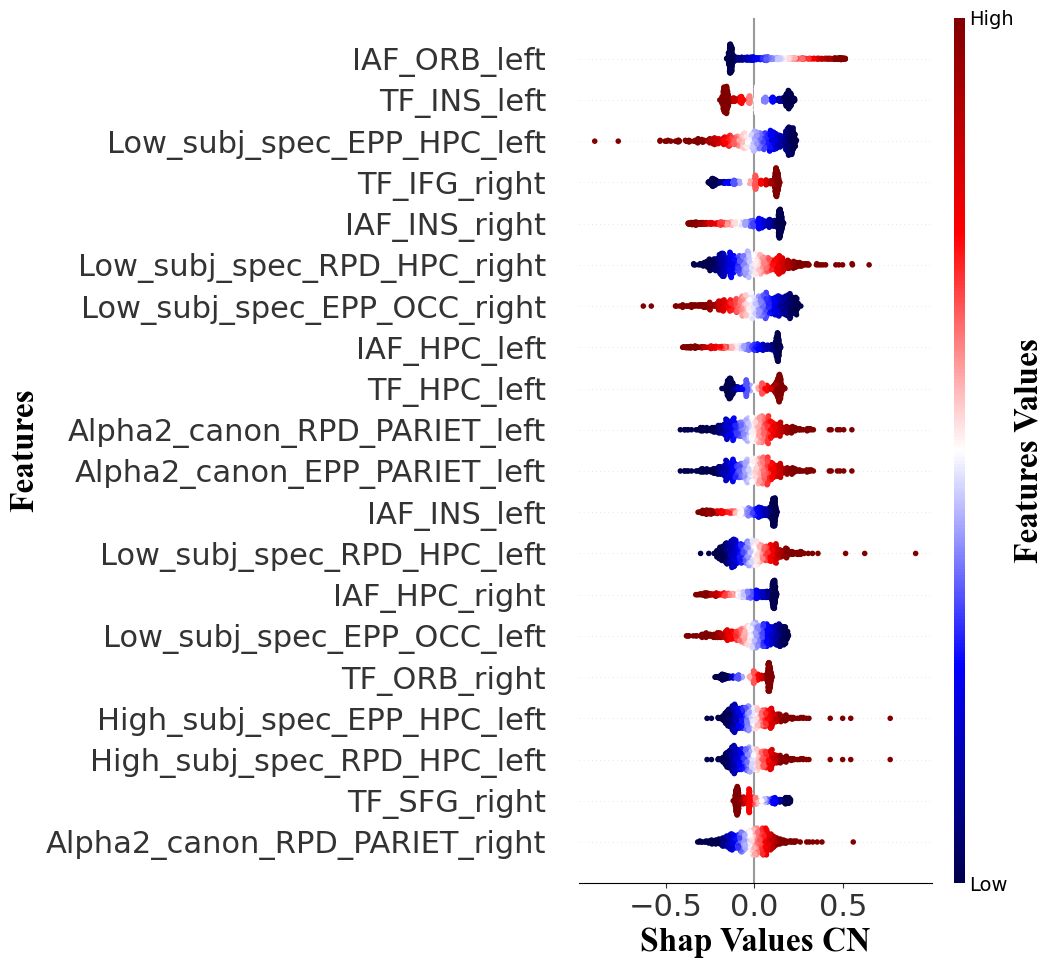

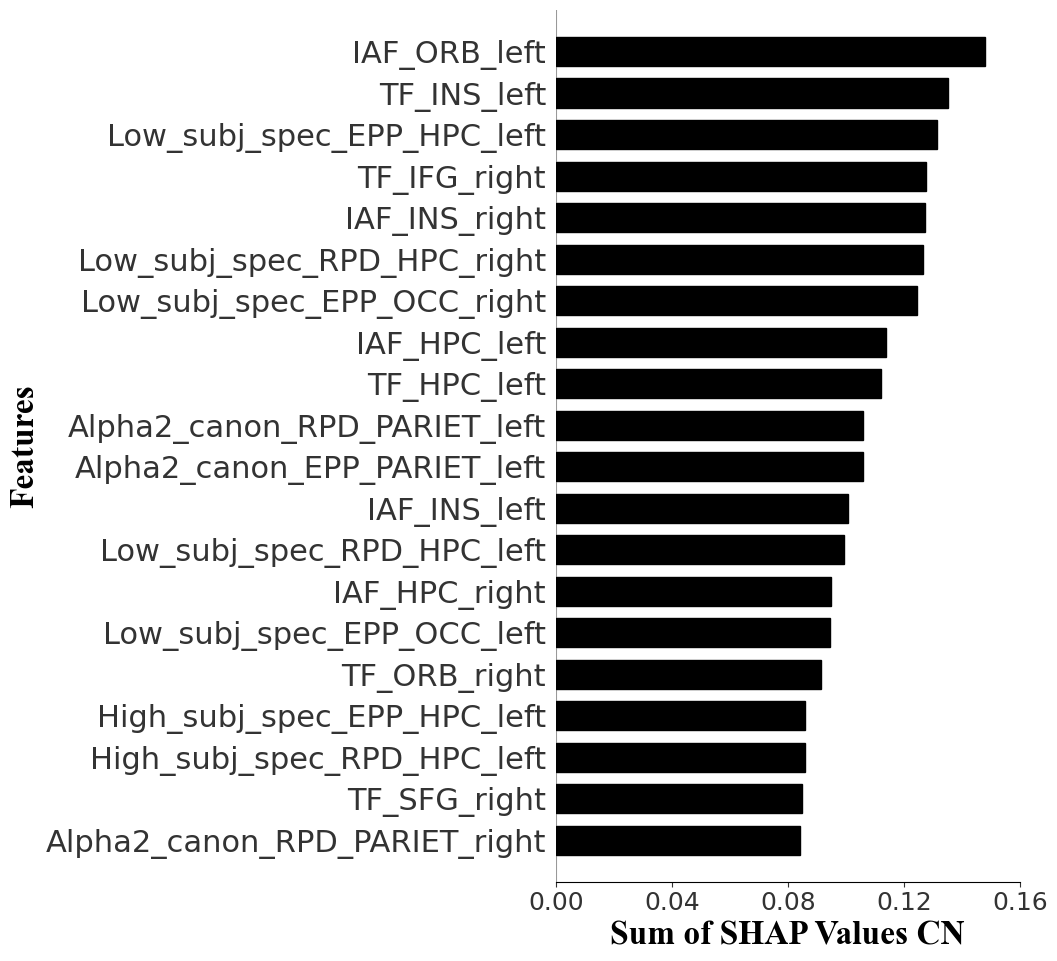

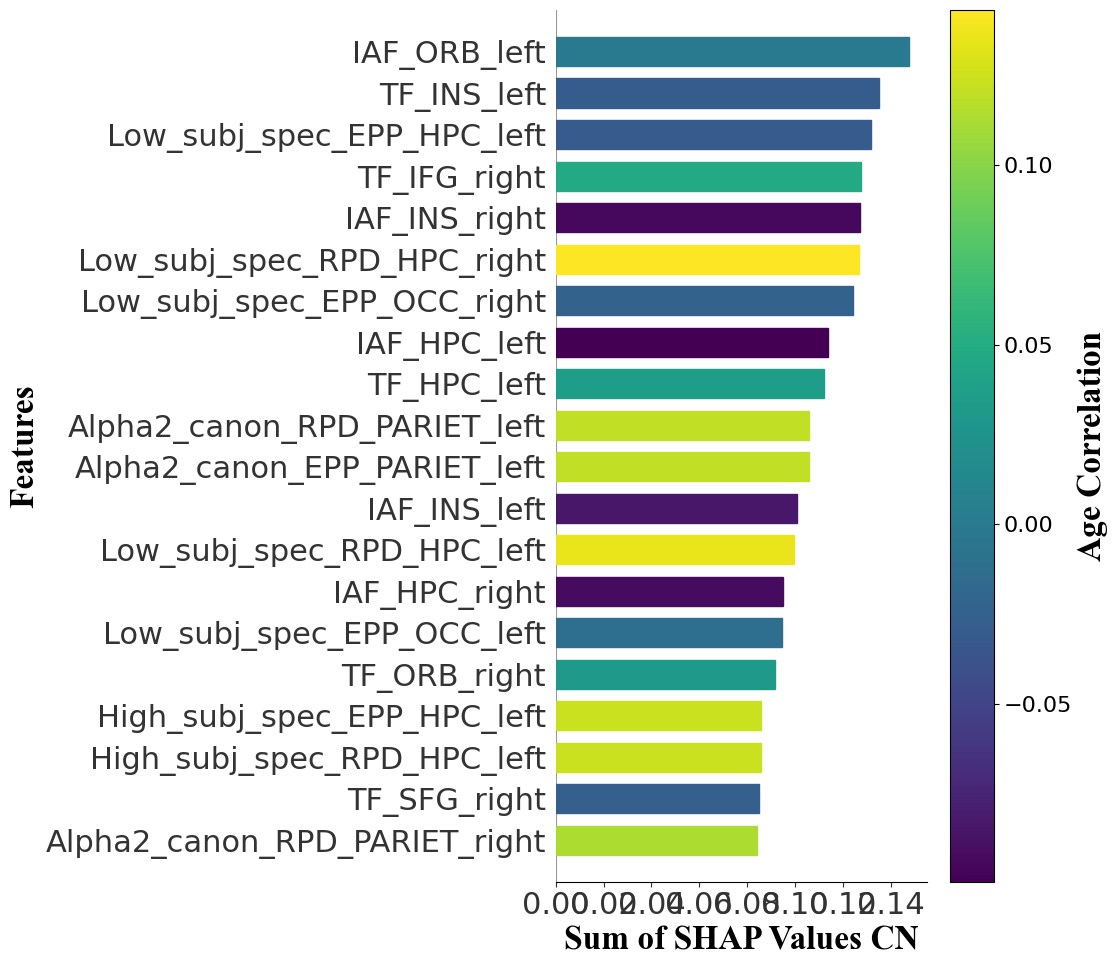

In [15]:
Plotters.plot_feature_importance(shap_values=shap_values_CN,X_test=X_CN,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1='Shap Values CN', xlabel2='Sum of SHAP Values CN',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [8]:
shap_per_region_sorted_CN, normalized_result_sorted_CN=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=20)

HPC_left: 1.000000
INS_left: 0.375289
HPC_right: 0.352170
PARIET_left: 0.336806
ORB_left: 0.235057
IFG_right: 0.202723
INS_right: 0.202347
OCC_right: 0.197769
OCC_left: 0.150196
ORB_right: 0.145618
SFG_right: 0.134895
PARIET_right: 0.133750


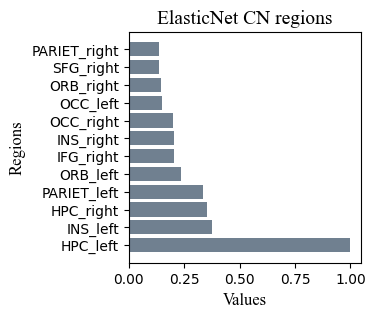

In [9]:
Plotters.plot_normalized_values(normalized_result_sorted_CN, color='slategray', name_set='ElasticNet CN regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


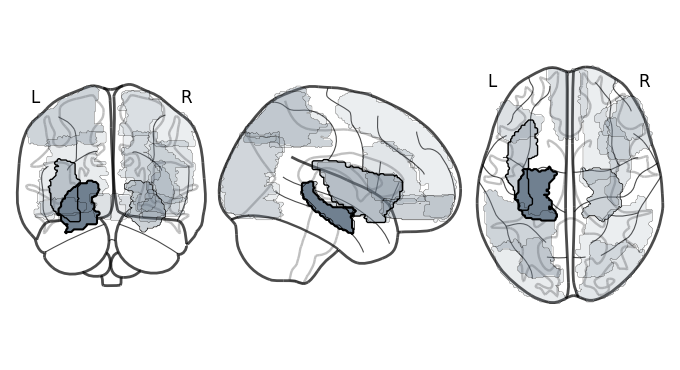

In [37]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_CN, base_path, color='slategray')

# SHAP AD

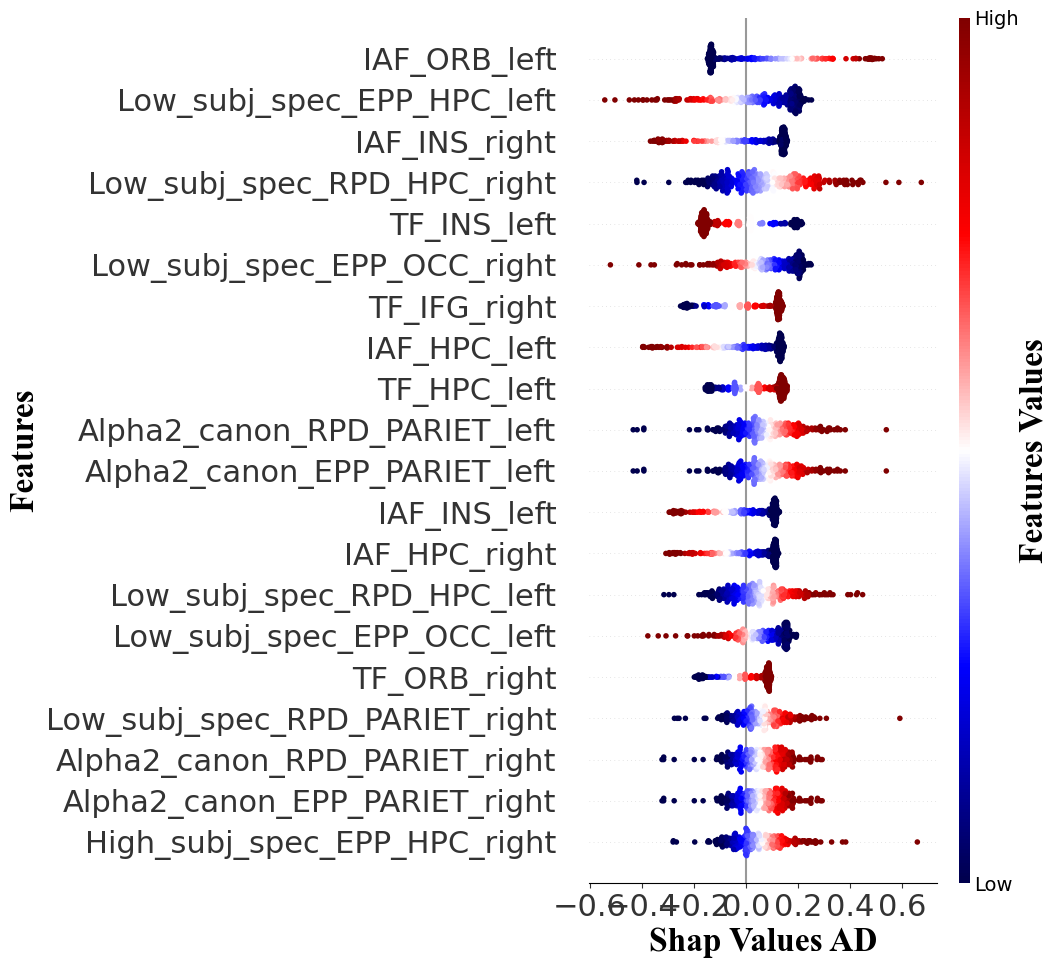

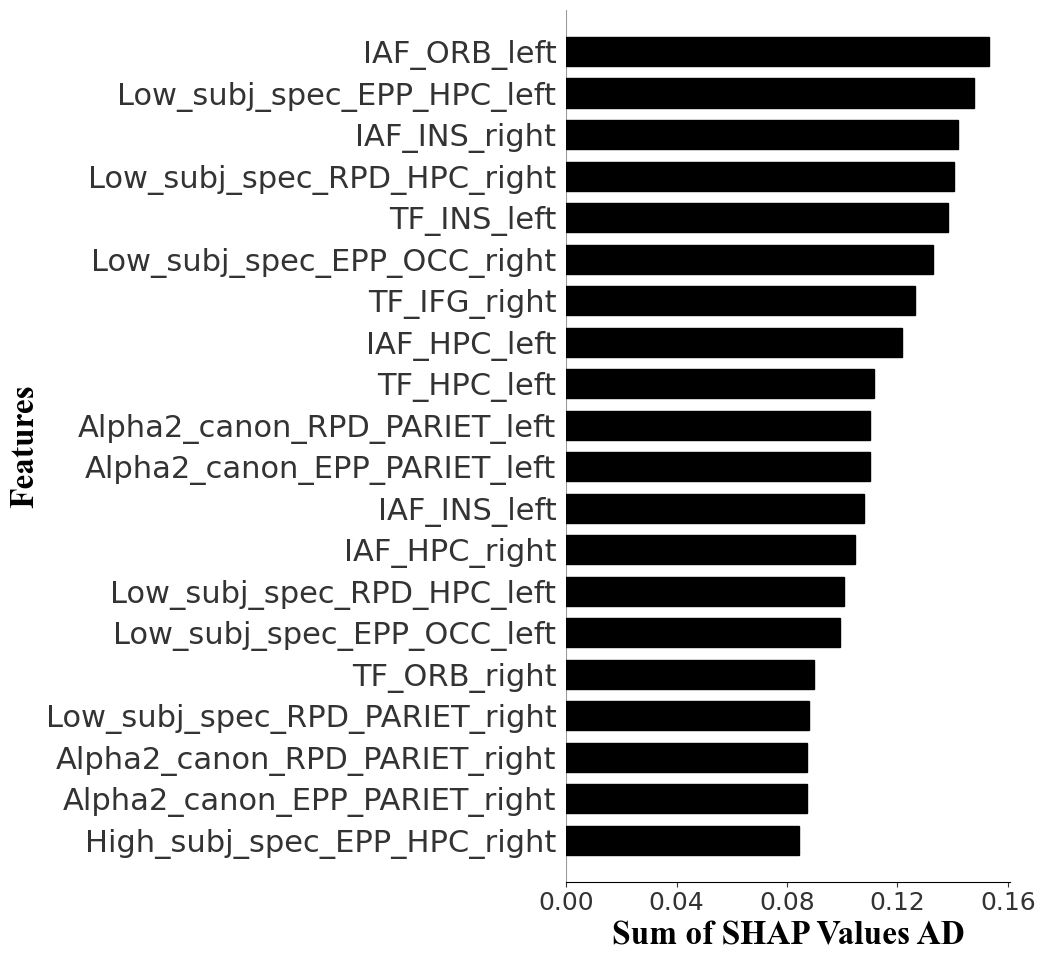

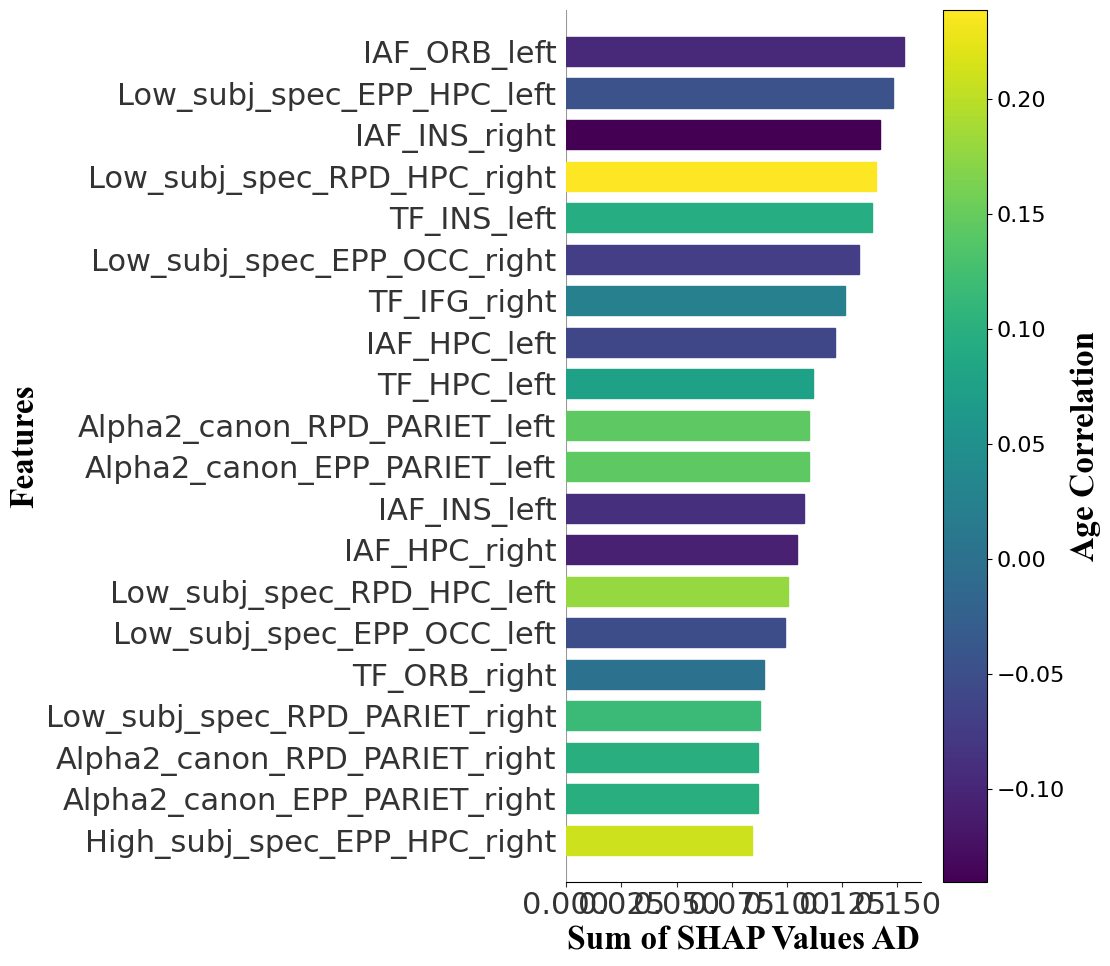

In [38]:
Plotters.plot_feature_importance(shap_values=shap_values_AD,X_test=X_AD,y_test=y_AD, font= "Times New Roman", fontsize=24, xlabel1='Shap Values AD', xlabel2='Sum of SHAP Values AD',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [10]:
shap_per_region_sorted_AD, normalized_result_sorted_AD=model.shap_region(shap_summary_sorted=shap_summary_sorted_AD, num_max=20)

HPC_left: 1.000000
HPC_right: 0.683542
PARIET_right: 0.543960
INS_left: 0.511177
PARIET_left: 0.456596
ORB_left: 0.317727
INS_right: 0.294968
OCC_right: 0.275629
IFG_right: 0.262535
OCC_left: 0.205933
ORB_right: 0.186197


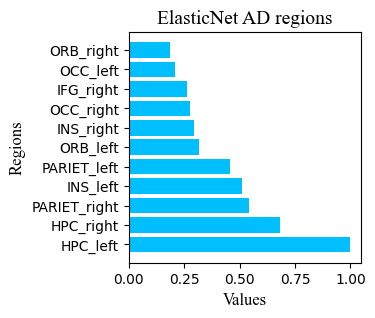

In [11]:
Plotters.plot_normalized_values(normalized_result_sorted_AD, color='deepskyblue', name_set='ElasticNet AD regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


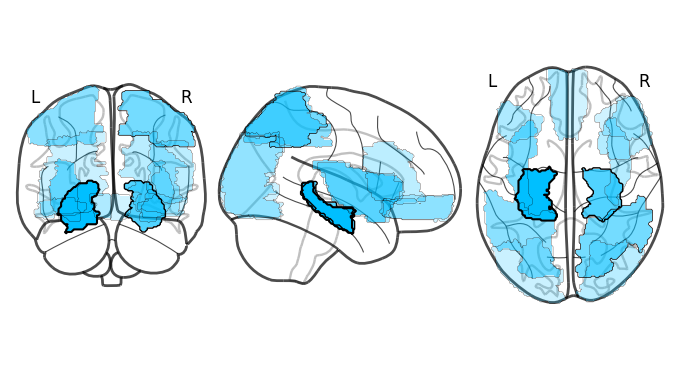

In [41]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_AD, base_path, color='deepskyblue')

# SHAP FTD

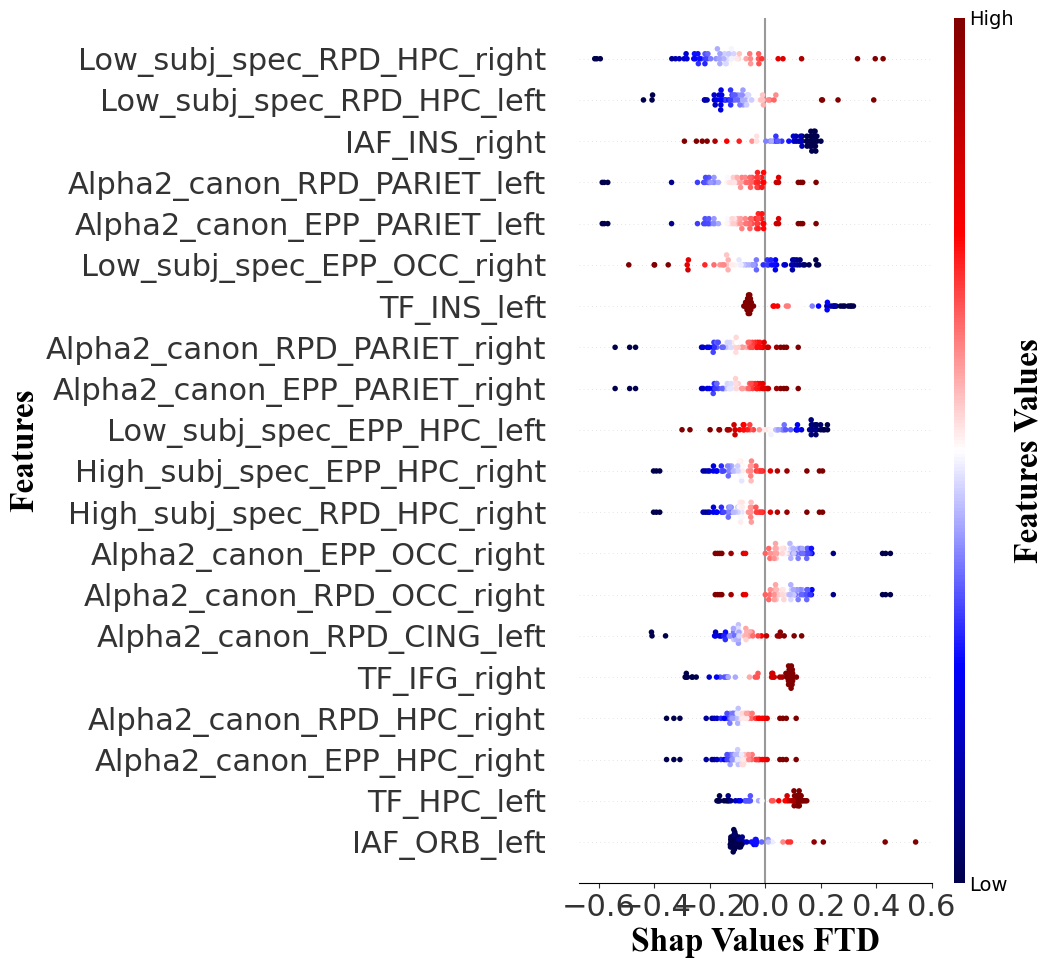

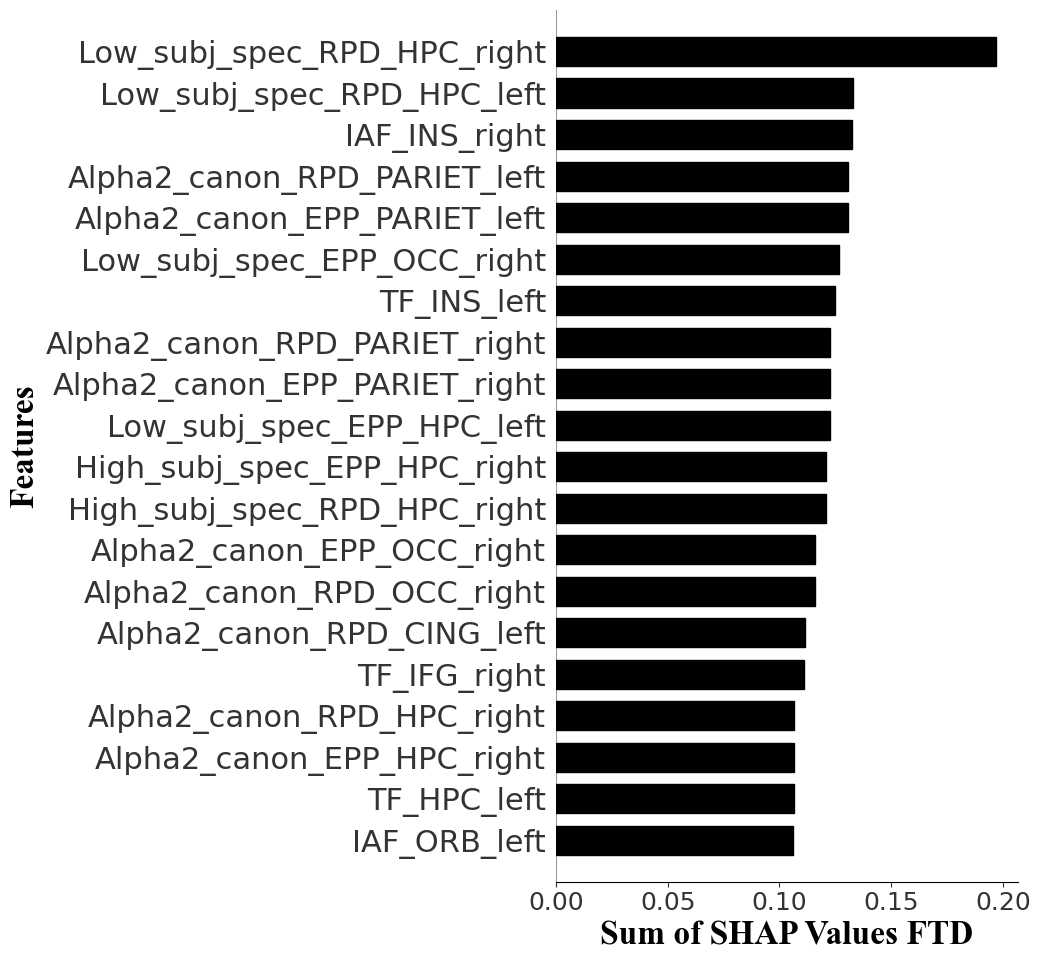

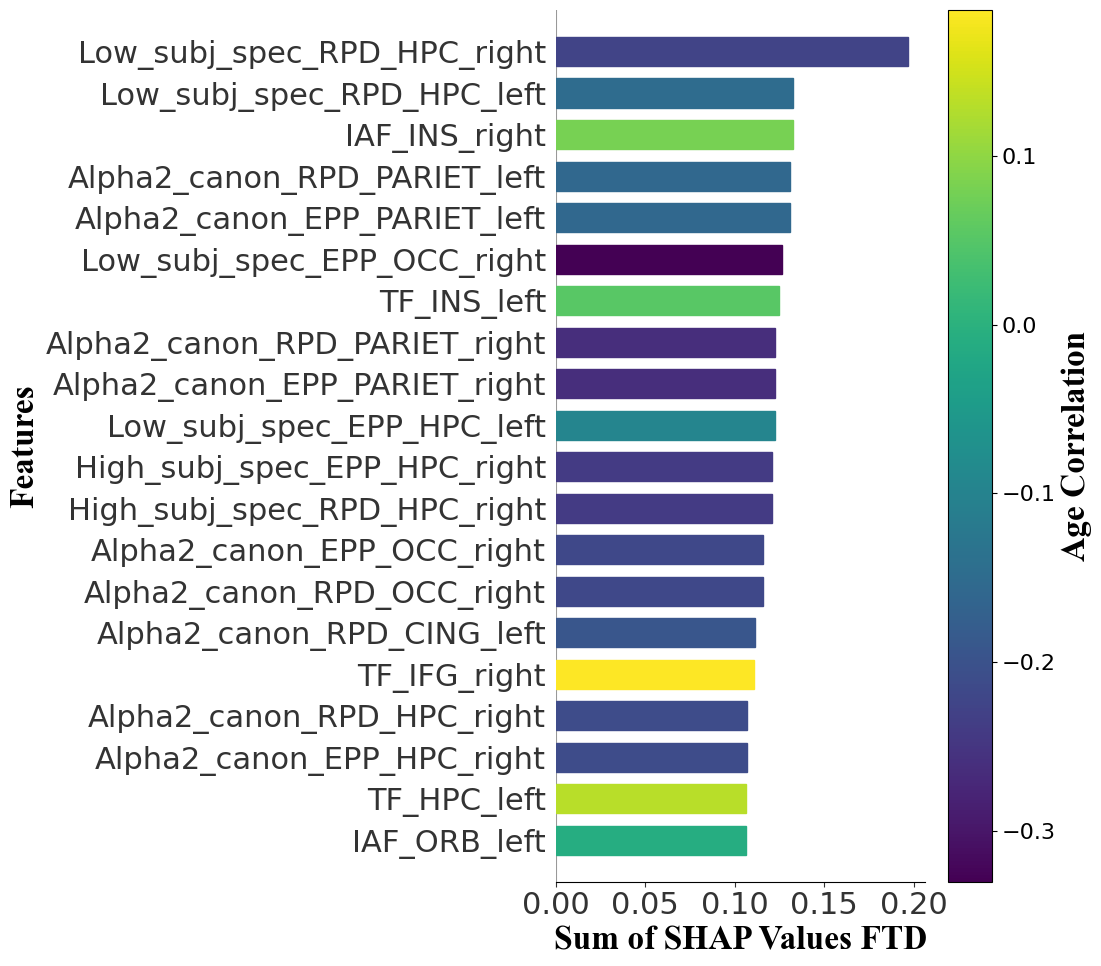

In [42]:
Plotters.plot_feature_importance(shap_values=shap_values_FTD,X_test=X_FTD,y_test=y_FTD, font= "Times New Roman", fontsize=24, xlabel1='Shap Values FTD', xlabel2='Sum of SHAP Values FTD',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [12]:
shap_per_region_sorted_FTD, normalized_result_sorted_FTD=model.shap_region(shap_summary_sorted=shap_summary_sorted_FTD, num_max=20)

HPC_right: 1.000000
HPC_left: 0.554757
OCC_right: 0.549919
PARIET_left: 0.401293
PARIET_right: 0.376709
INS_right: 0.203062
INS_left: 0.191211
CING_left: 0.170796
IFG_right: 0.169995
ORB_left: 0.162905


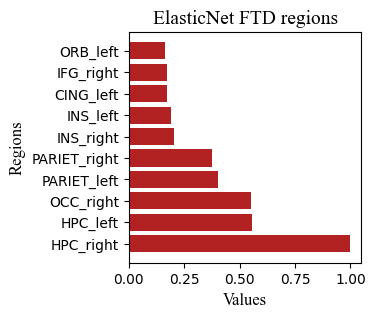

In [13]:
Plotters.plot_normalized_values(normalized_result_sorted_FTD, color='firebrick', name_set='ElasticNet FTD regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


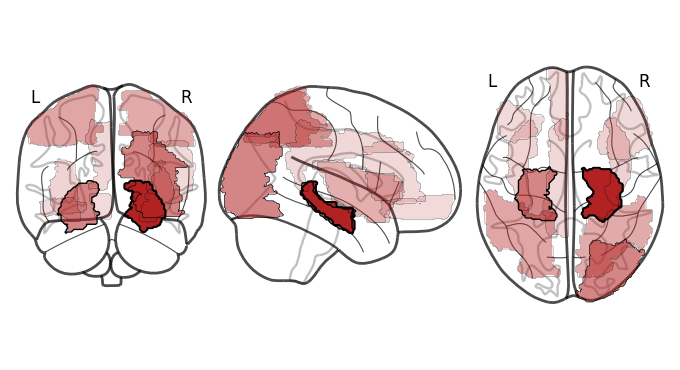

In [45]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_FTD, base_path, color='firebrick')

# SHAP MCI

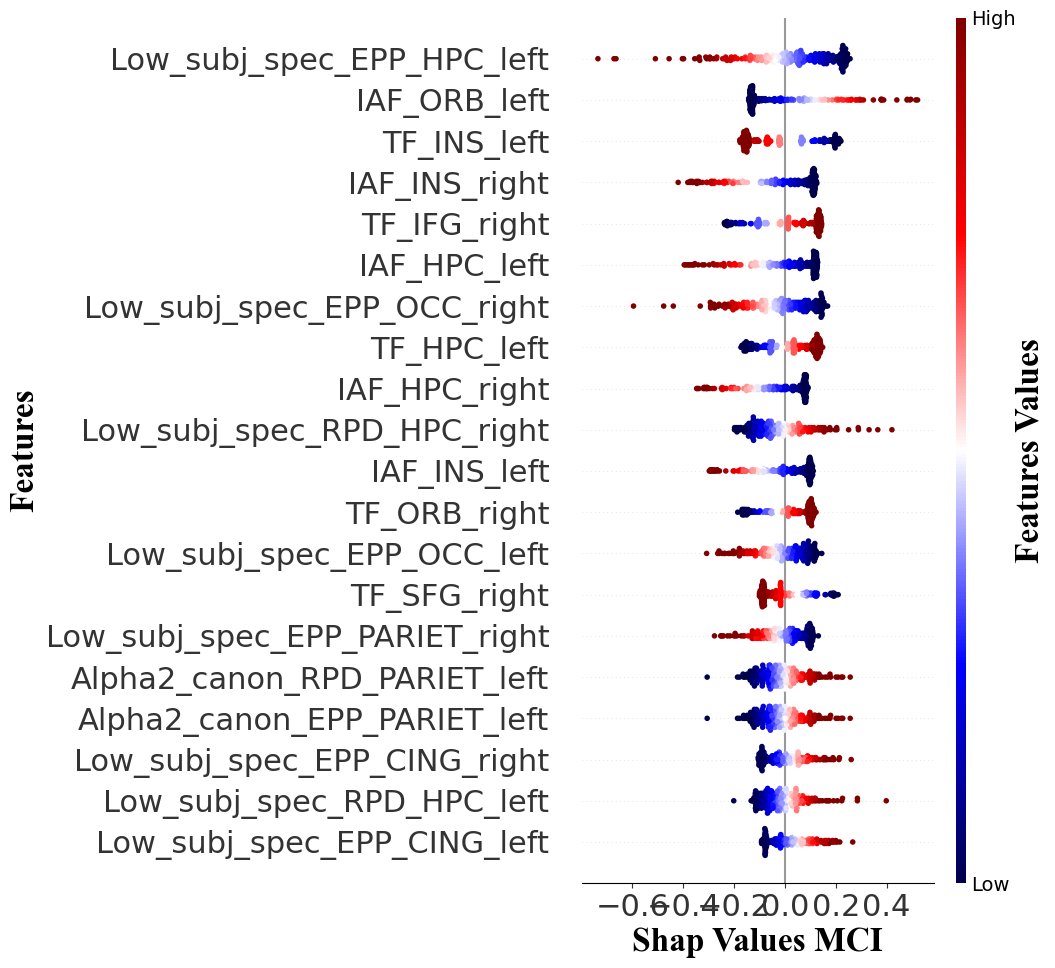

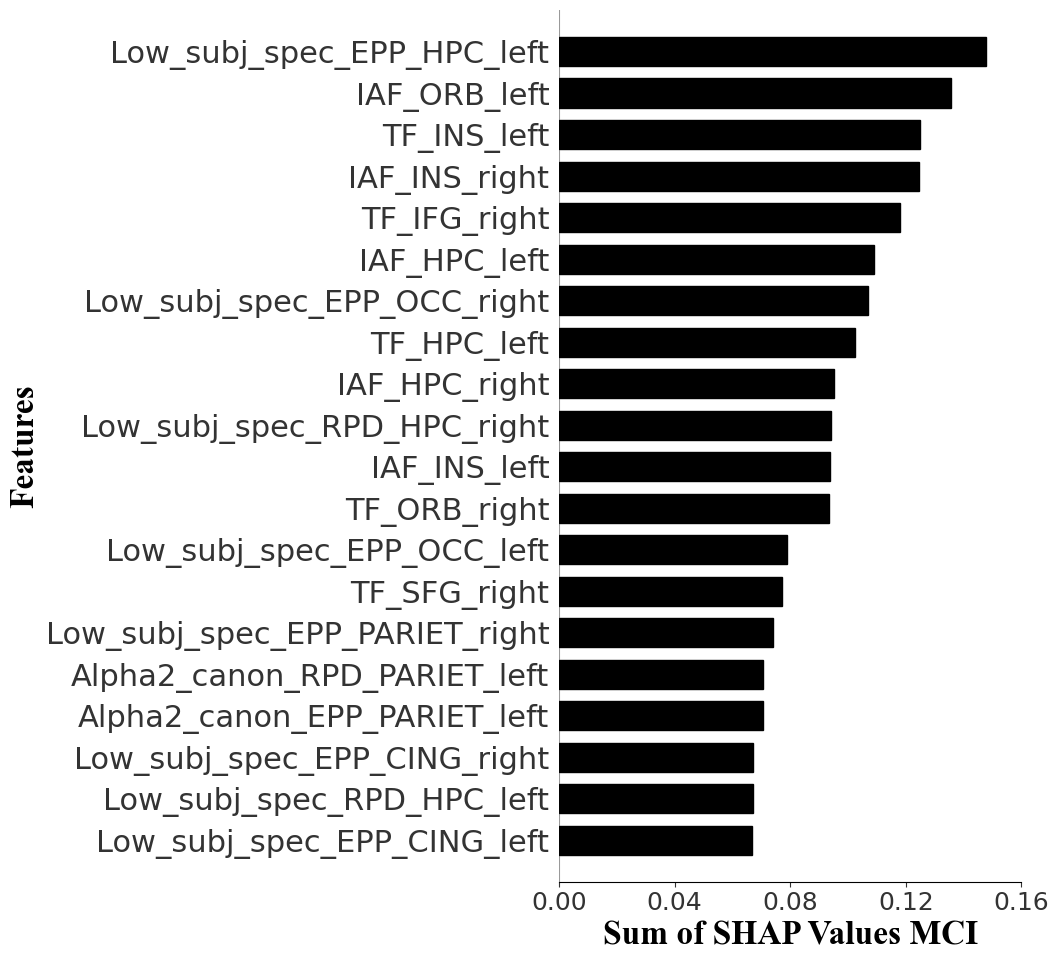

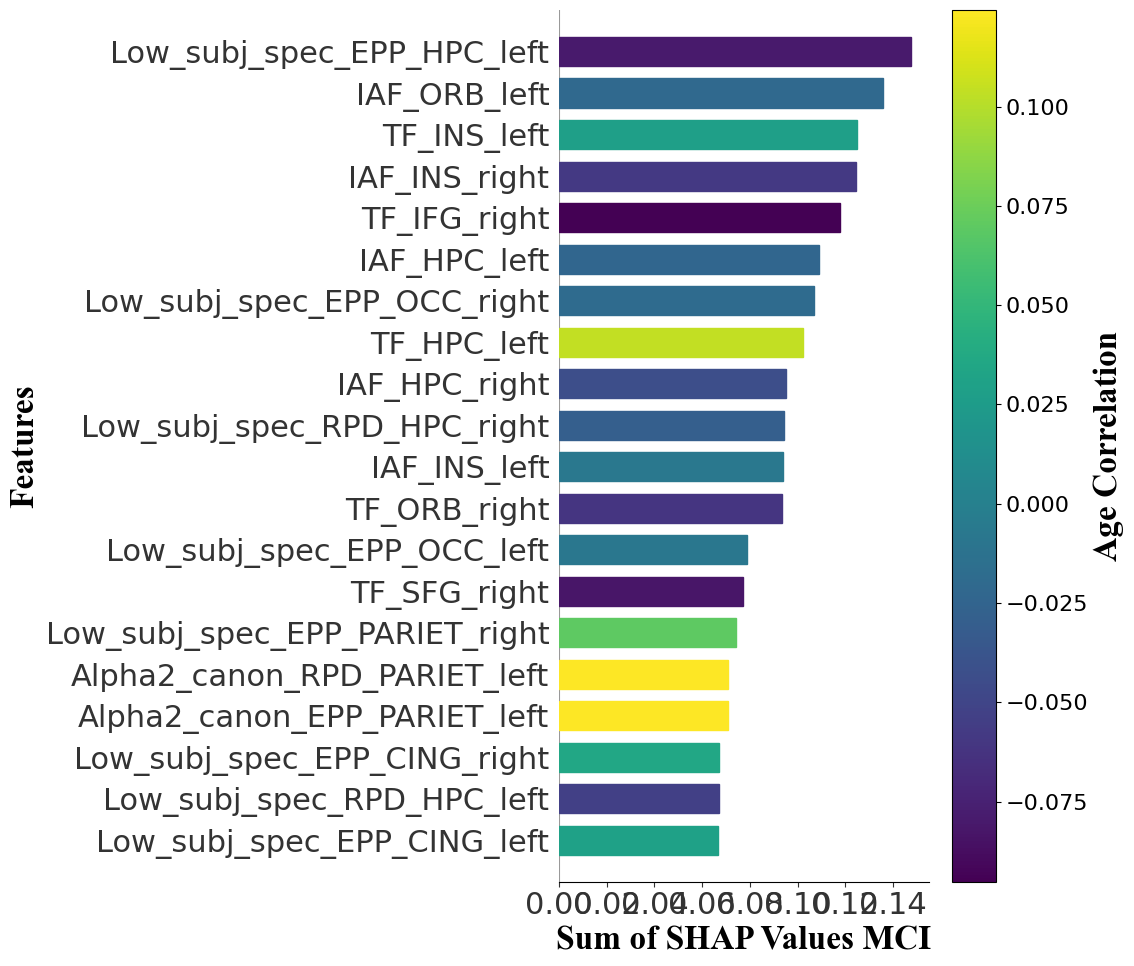

In [46]:
Plotters.plot_feature_importance(shap_values=shap_values_MCI,X_test=X_MCI,y_test=y_MCI, font= "Times New Roman", fontsize=24, xlabel1='Shap Values MCI', xlabel2='Sum of SHAP Values MCI',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [14]:
shap_per_region_sorted_MCI, normalized_result_sorted_MCI=model.shap_region(shap_summary_sorted=shap_summary_sorted_MCI, num_max=20)

HPC_left: 1.000000
INS_left: 0.513658
HPC_right: 0.444765
PARIET_left: 0.332012
ORB_left: 0.318416
INS_right: 0.292278
IFG_right: 0.276670
OCC_right: 0.250899
ORB_right: 0.219028
OCC_left: 0.184965
SFG_right: 0.181159
PARIET_right: 0.173856
CING_right: 0.157491
CING_left: 0.156458


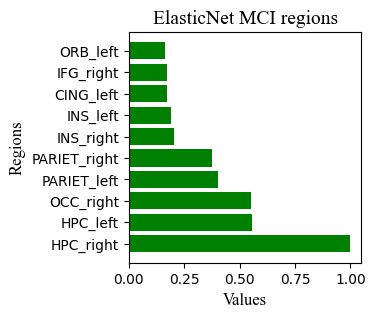

In [16]:
Plotters.plot_normalized_values(normalized_result_sorted_FTD, color='green', name_set='ElasticNet MCI regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


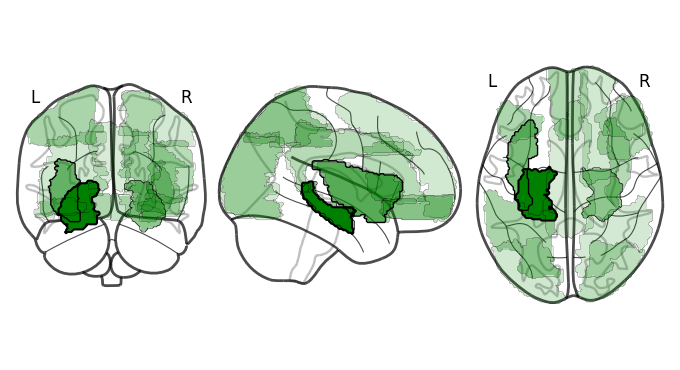

In [50]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_MCI, base_path, color='green')

# SHAP PD

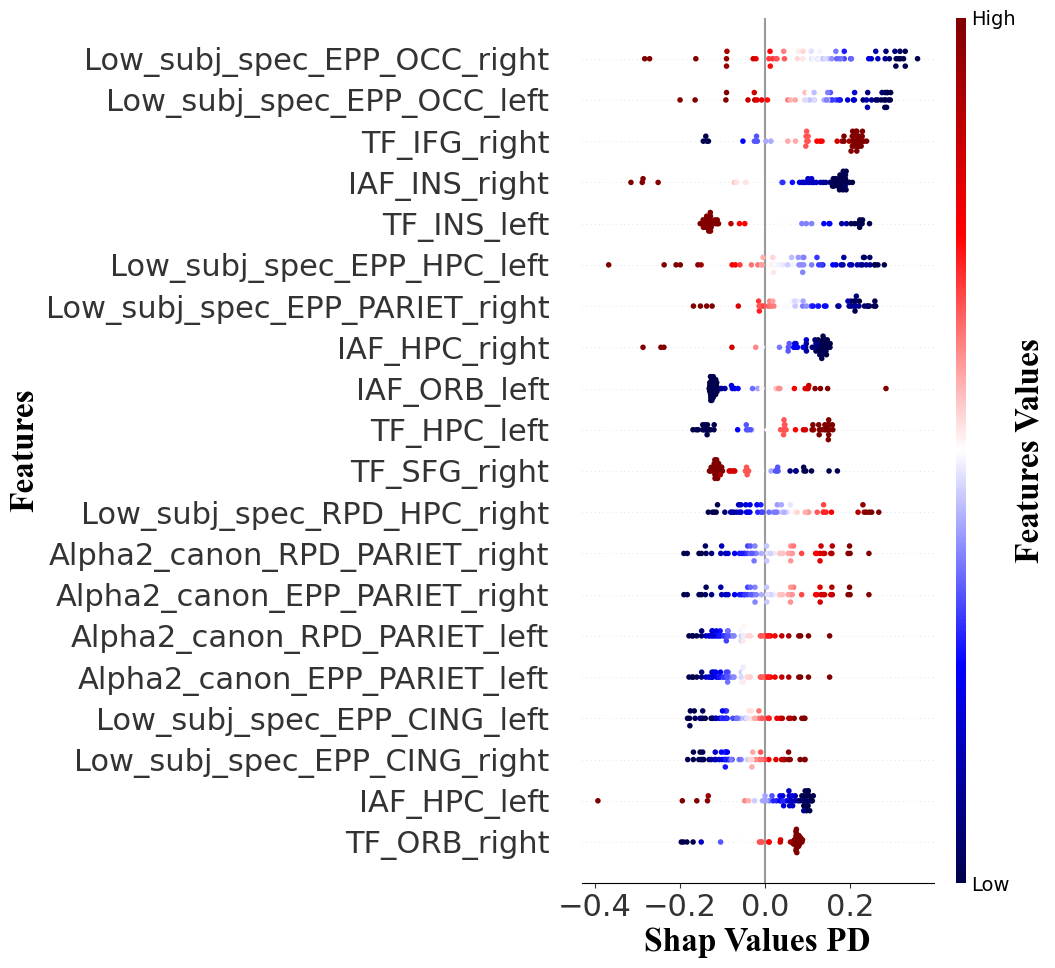

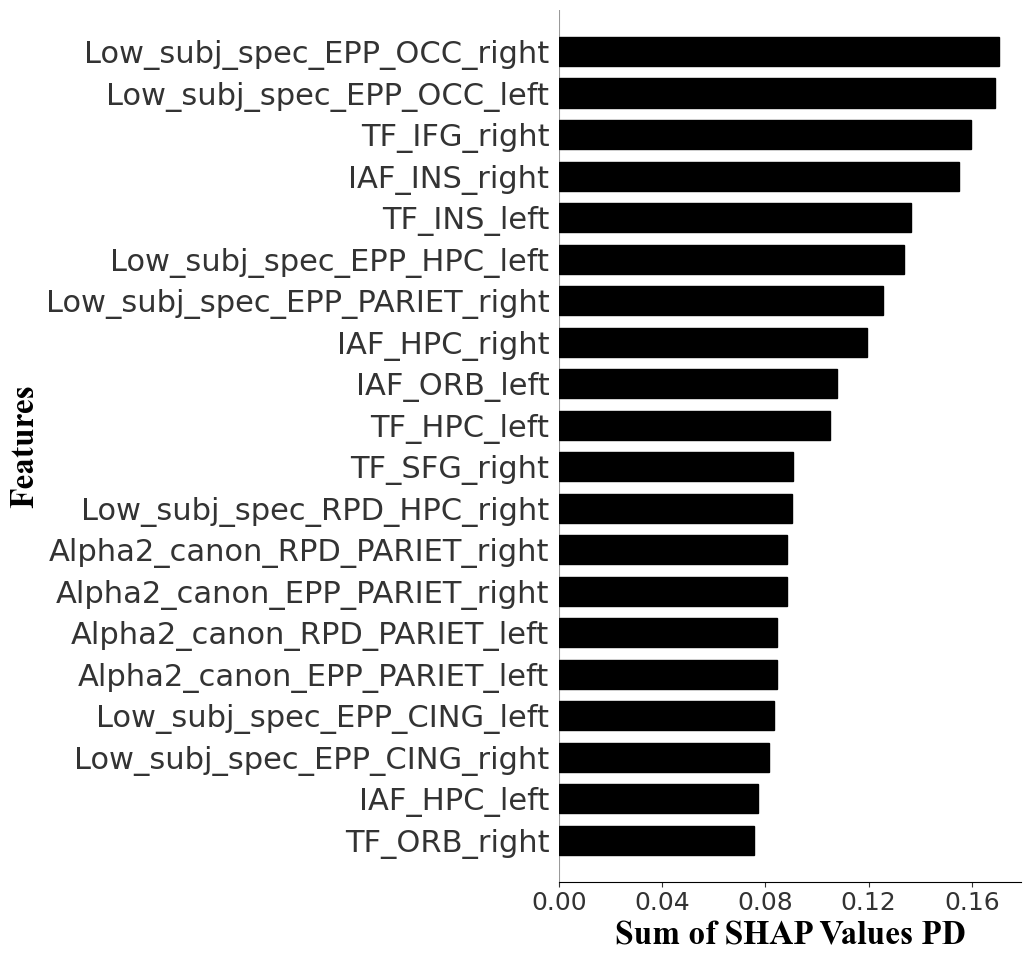

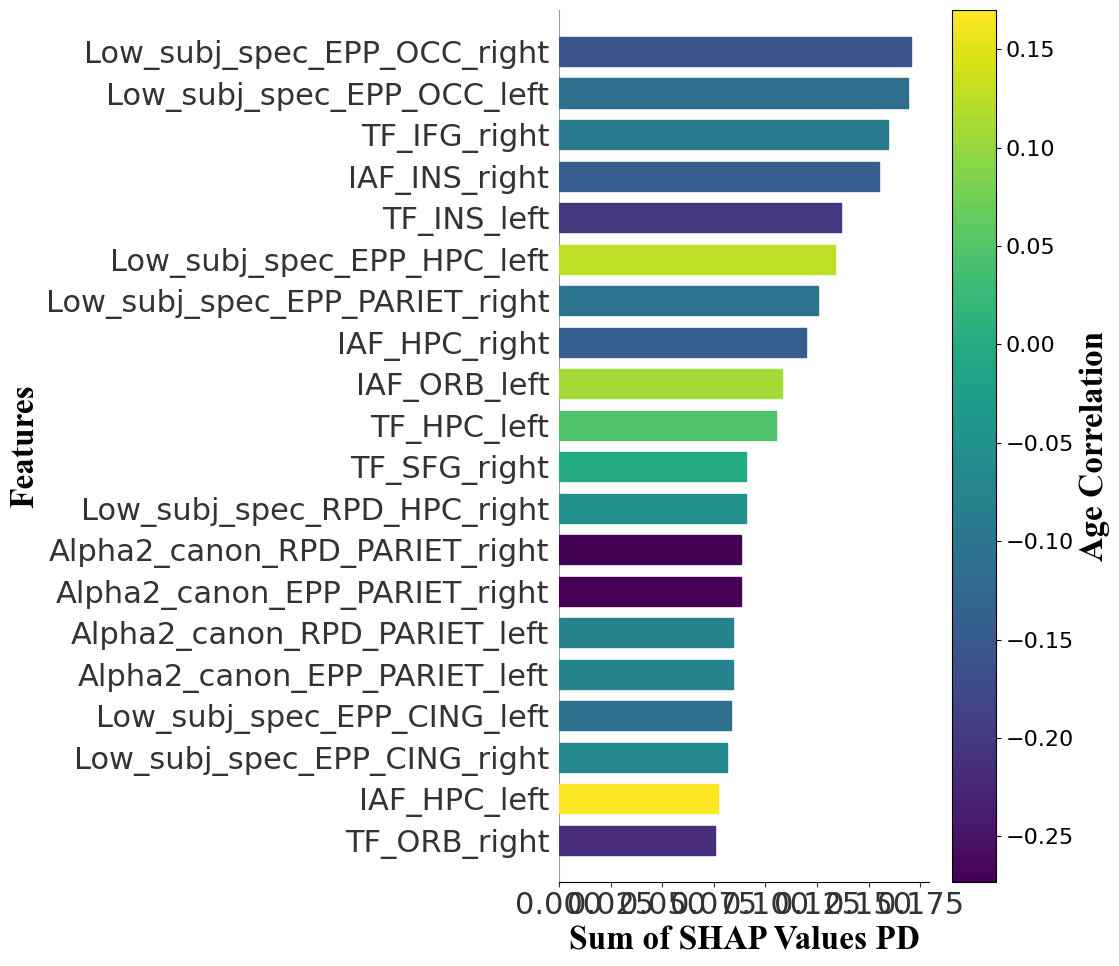

In [51]:
Plotters.plot_feature_importance(shap_values=shap_values_PD,X_test=X_PD,y_test=y_PD, font= "Times New Roman", fontsize=24, xlabel1='Shap Values PD', xlabel2='Sum of SHAP Values PD',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [17]:
shap_per_region_sorted_PD, normalized_result_sorted_PD=model.shap_region(shap_summary_sorted=shap_summary_sorted_PD, num_max=20)

HPC_left: 1.000000
PARIET_right: 0.955619
HPC_right: 0.664684
OCC_right: 0.540317
OCC_left: 0.534749
PARIET_left: 0.533873
IFG_right: 0.505154
INS_right: 0.490742
INS_left: 0.432355
ORB_left: 0.341275
SFG_right: 0.287152
CING_left: 0.263606
CING_right: 0.258204
ORB_right: 0.239134


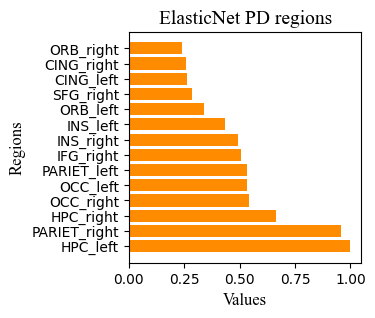

In [18]:
Plotters.plot_normalized_values(normalized_result_sorted_PD, color='darkorange', name_set='ElasticNet PD regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


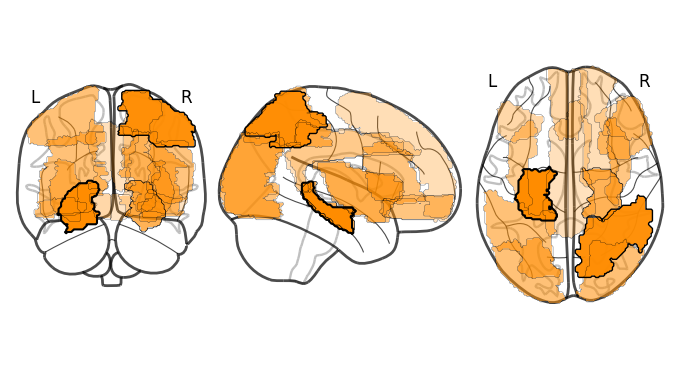

In [53]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_PD, base_path, color='darkorange')

# Associations

In [16]:
import pandas as pd

# Cargar los dataframes desde los archivos Excel
df_CN_combined = pd.read_excel('results/df_CN_combined.xlsx')
df_AD_combined = pd.read_excel('results/df_AD_combined.xlsx')
df_FTD_combined = pd.read_excel('results/df_FTD_combined.xlsx')
df_MCI_combined = pd.read_excel('results/df_MCI_combined.xlsx')
df_PD_combined = pd.read_excel('results/df_PD_combined.xlsx')

# Ahora los dataframes tienen los datos cargados desde los archivos Excel


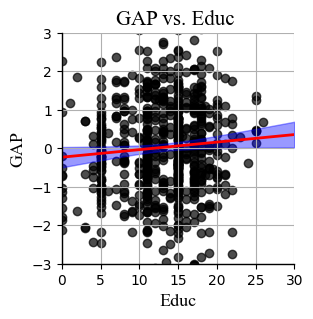

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el dataframe para incluir solo Educ < 30
df_filtered = df_CN_combined[df_CN_combined['Educ'] < 30]

Plotters.plot_regresion(y=df_filtered['GAP_corrected'],x= df_filtered['Educ'], label_='Test Data',x_ticks_step=5,y_ticks_step=1,x_min_limit=0,y_min_limit=-3,x_max_limit=30,y_max_limit=3,color='Black', title='GAP vs. Educ ',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Educ',ylabel='GAP',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=False, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2, legend_metrics=False, print_metrics=False)

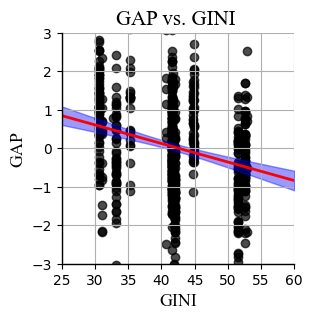

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el dataframe para incluir solo GINI < 30 y eliminar filas con valores nulos en GINI
df_filtered = df_CN_combined[(df_CN_combined['Educ'] < 30) & (df_CN_combined['GINI'].notna())]
Plotters.plot_regresion(y=df_filtered['GAP_corrected'],x= df_filtered['GINI'], label_='Test Data',x_ticks_step=5,y_ticks_step=1,x_min_limit=25,y_min_limit=-3,x_max_limit=60,y_max_limit=3,color='Black', title='GAP vs. GINI ',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='GINI',ylabel='GAP',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=False, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2, legend_metrics=False, print_metrics=False)